### lesson 3  
LiDARの動作確認をしましょう．  
【TODO】連続的な表示の方法が分からない．

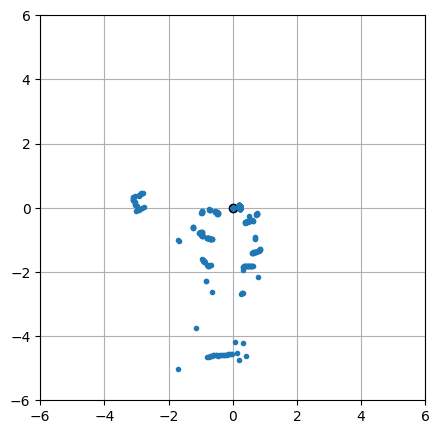

In [ ]:
import math
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import kachaka_api

client = kachaka_api.aio.KachakaApiClient()

while True:
    async for scan in client.ros_laser_scan.stream():
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(5, 5))
    
        n = len(scan.ranges)
        x, y = [0]*n, [0]*n
        for i in range(n):
            theta = scan.angle_min + scan.angle_increment * i
            x[i] = scan.ranges[i] * math.cos(theta)
            y[i] = scan.ranges[i] * math.sin(theta)
    
        plt.plot(0, 0, "o", color="black")
        plt.plot(x, y, ".")
        plt.xlim(-6.0, 6.0)
        plt.ylim(-6.0, 6.0)
        plt.grid(True)
        ax.set_aspect("equal", adjustable="box")
        display(fig)
        plt.close(fig)